In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Health_insurance.csv')

In [22]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.isnull().sum()
# no null values... we can directly proceed with the Train and test after some EDA

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

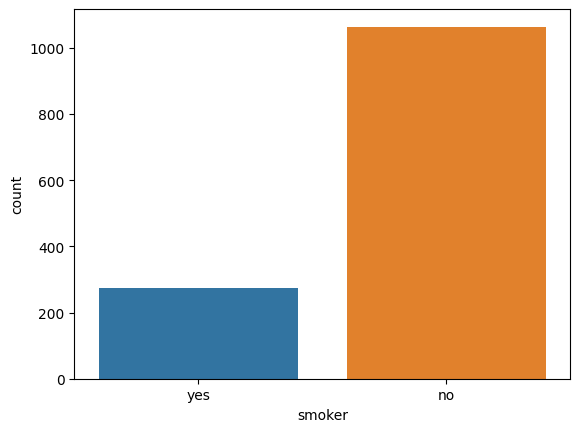

In [13]:
# in the dataset Smoker column is very important so we check who all smoke and who don't
sns.countplot(data=data,x='smoker')

In [19]:
# to get proper readings we use 'Plotly' library
import plotly.express as px
plt.figure(figsize=(10,12))
px.histogram(data_frame=data,x='sex',color='smoker',title='Number of Smokers')

<Figure size 1000x1200 with 0 Axes>

In [20]:
# as sex and smoker columns are important to the dataset we change string to boolean
data['sex'] = data['sex'].map({'female':0,'male':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [25]:
pie = data['region'].value_counts()

In [26]:
pie.index

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

In [27]:
pie.values

array([364, 325, 325, 324], dtype=int64)

In [30]:
px.pie(data_frame=data,values=pie.values,names=pie.index)

In [33]:
# lets see the correlation of this dataset
data.corr()

C:\Users\Vinith Reddy\AppData\Local\Temp\ipykernel_15368\4233422729.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<AxesSubplot:>

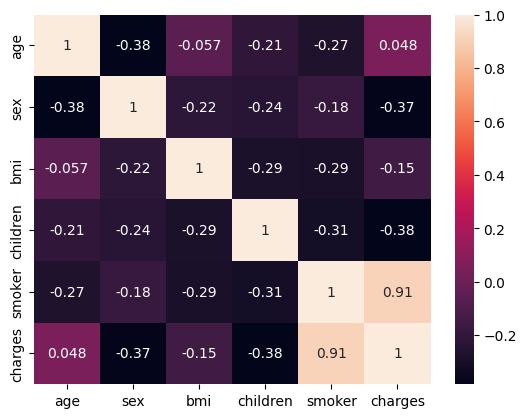

In [39]:
corrr = data[['age', 'sex', 'bmi', 'children', 'smoker','charges']].corr()
sns.heatmap(corrr.corr(),annot=True)

In [42]:
# Train and Test the data
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [50]:
px.scatter(x=y_test,y=y_pred,trendline='ols')

In [64]:
final_data =  pd.DataFrame(data={'Predicted Premium amount':y_pred})

In [67]:
final_data.head(5)

,Predicted Premium amount
0,8504.259528
1,6897.839411
2,36805.011783
3,9525.016402
4,26834.157836


# Using Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
forest = RandomForestRegressor()

In [70]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
forest_pred = forest.predict(X_test)

In [73]:
forest_data =  pd.DataFrame(data={'Predicted Premium amount':forest_pred})

In [75]:
forest_data.head()

,Predicted Premium amount
0,8848.379150
1,5631.069481
2,27918.163913
3,10462.036541
4,34446.917057


In [76]:
final_data.head()

,Predicted Premium amount
0,8504.259528
1,6897.839411
2,36805.011783
3,9525.016402
4,26834.157836


In [89]:
# while using Linear Regression it peroforms 74%
round(lr.score(X,y)*100,2)

74.95

In [87]:
# while using Forest
round(forest.score(X,y)*100,2)

93.62